In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras>=3.0.0 in c:\users\c. chandraprakash\anaconda3\lib\site-packages (from tensorflow-intel==2.16.2->tensorflow) (3.4.1)



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

C:\Users\c. chandraprakash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataf = pd.read_csv('polymer_merged_cuboid.csv')

In [5]:
dataf

rho      E     nu    a    b    c        f1        f2        f3  \
0        920.000  1.000  0.400  1.0  2.0  8.0  0.987485  0.988297  0.988952   
1        900.000  1.380  0.420  1.0  2.0  8.0  0.982318  0.982887  0.983525   
2       1400.000  2.800  0.400  1.0  2.0  8.0  0.978755  0.980834  0.982996   
3       1490.000  6.000  0.350  1.0  2.0  8.0  0.961999  0.962285  0.965113   
4       1740.000  0.800  0.490  1.0  2.0  8.0  0.991499  0.992805  0.994411   
...          ...    ...    ...  ...  ...  ...       ...       ...       ...   
282492  1159.775  1.091  0.405  4.0  8.0  9.0  0.999135  0.999257  0.999276   
282493  1181.303  6.121  0.408  4.0  8.0  9.0  0.995207  0.995392  0.995952   
282494  1296.140  5.646  0.386  4.0  8.0  9.0  0.996725  0.997005  0.997064   
282495  1906.271  5.209  0.421  4.0  8.0  9.0  0.997794  0.997899  0.997914   
282496  1403.680  3.130  0.372  4.0  8.0  9.0  0.998300  0.998464  0.998616   

              f4  ...       f21       f22       f23       f24       f25  \
0       0.989568  ...  1.005184  1.006504  1.007279  1.008231  1.008527   
1       0.984575  ...  1.003252  1.004691  1.008078  1.009359  1.009531   
2       0.983527  ...  1.009662  1.010879  1.011256  1.013431  1.014195   
3       0.967011  ...  1.008717  1.008762  1.016295  1.017102  1.017695   
4       0.995036  ...  1.004288  1.004557  1.004758  1.005418  1.006616   
...          ...  ...       ...       ...       ...       ...       ...   
282492  0.999282  ...  1.000437  1.000555  1.000614  1.000740  1.000786   
282493  0.997210  ...  1.002223  1.002491  1.002730  1.002887  1.002903   
282494  0.997664  ...  1.000811  1.001316  1.001402  1.002016  1.002673   
282495  0.997934  ...  1.000918  1.000998  1.001136  1.001159  1.001771   
282496  0.998649  ...  1.000552  1.000556  1.000887  1.000966  1.001193   

             f26       f27       f28       f29       f30  
0       1.008992  1.010188  1.010613  1.011200  1.011248  
1       1.011175  1.012255  1.013992  1.015662  1.016843  
2       1.015234  1.016604  1.016993  1.018041  1.018829  
3       1.024019  1.024360  1.026227  1.027848  1.031468  
4       1.007267  1.008403  1.008599  1.008618  1.008808  
...          ...       ...       ...       ...       ...  
282492  1.000854  1.000856  1.000905  1.000919  1.000943  
282493  1.003380  1.003422  1.003788  1.004615  1.005007  
282494  1.002797  1.003127  1.003227  1.003773  1.004100  
282495  1.001987  1.002047  1.002200  1.002286  1.002327  
282496  1.001235  1.001359  1.001370  1.001565  1.001672  

[282497 rows x 36 columns]

In [7]:
X = dataf[['rho','a','b','c', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
dataf['nu']= dataf['nu']*10000

Y = dataf[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [15]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_split=0.1)

Epoch 1/1500


C:\Users\c. chandraprakash\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 330979.9688 - val_loss: 55088.1055
Epoch 2/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 55493.5664 - val_loss: 53221.4219
Epoch 3/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 54415.7383 - val_loss: 50907.6367
Epoch 4/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 53832.5898 - val_loss: 50496.4531
Epoch 5/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 53499.6992 - val_loss: 56953.0156
Epoch 6/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 52926.2656 - val_loss: 50696.6758
Epoch 7/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 52663.4531 - val_loss: 51650.3633
Epoch 8/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 52348.6484 - val_loss: 51725.3320
Epoch 9/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 52349.1875 - val_loss: 51978.3984
Epoch 10/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 51767.3281 - val_loss: 50712.4844
E

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48592.8281 - val_loss: 50325.6172
Epoch 62/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48590.6836 - val_loss: 47777.8984
Epoch 63/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48432.9219 - val_loss: 49582.9141
Epoch 64/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48563.0078 - val_loss: 48240.0078
Epoch 65/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48410.8164 - val_loss: 48147.5703
Epoch 66/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48352.1133 - val_loss: 48224.8047
Epoch 67/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48156.9062 - val_loss: 48408.4336
Epoch 68/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48139.7031 - val_loss: 47931.8086
Epoch 69/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48219.7188 - val_loss: 47705.2734
Epoch 70/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 48192.3359 - val_loss: 48045

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 47081.4531 - val_loss: 46710.0312
Epoch 122/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46976.0742 - val_loss: 47415.0469
Epoch 123/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46982.4531 - val_loss: 48005.5781
Epoch 124/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 47134.7422 - val_loss: 48640.3398
Epoch 125/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46961.0039 - val_loss: 49406.7734
Epoch 126/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 47103.6055 - val_loss: 48786.0625
Epoch 127/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46956.3984 - val_loss: 50257.9453
Epoch 128/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 47067.3125 - val_loss: 47702.5312
Epoch 129/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 47000.5234 - val_loss: 49291.4219
Epoch 130/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46983.0703 - val_lo

Epoch 181/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46104.6406 - val_loss: 46868.9102
Epoch 182/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46297.3516 - val_loss: 46539.3125
Epoch 183/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46261.4688 - val_loss: 48291.1367
Epoch 184/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46323.6055 - val_loss: 47752.6914
Epoch 185/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46241.9258 - val_loss: 46375.7070
Epoch 186/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46239.9766 - val_loss: 46891.8164
Epoch 187/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46165.9258 - val_loss: 46332.6484
Epoch 188/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46280.3398 - val_loss: 46600.3555
Epoch 189/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 46160.2734 - val_loss: 47159.1250
Epoch 190/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 4616

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45626.5078 - val_loss: 46576.9180
Epoch 241/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45583.9727 - val_loss: 47153.6367
Epoch 242/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45765.3320 - val_loss: 46077.5391
Epoch 243/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45550.5039 - val_loss: 46440.4336
Epoch 244/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45326.6680 - val_loss: 46276.3555
Epoch 245/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45573.5664 - val_loss: 46347.5977
Epoch 246/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45587.7500 - val_loss: 46534.3477
Epoch 247/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45312.8477 - val_loss: 46906.5312
Epoch 248/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45393.4961 - val_loss: 46112.3828
Epoch 249/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45539.8867 - val_lo

Epoch 300/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45028.2305 - val_loss: 46114.8086
Epoch 301/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44950.9219 - val_loss: 47563.6094
Epoch 302/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45192.7383 - val_loss: 46033.1289
Epoch 303/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45275.7305 - val_loss: 46640.9336
Epoch 304/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45194.7227 - val_loss: 46306.0156
Epoch 305/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45121.8750 - val_loss: 45842.7891
Epoch 306/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45148.3789 - val_loss: 46233.1836
Epoch 307/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44848.3711 - val_loss: 46333.3320
Epoch 308/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 45191.4648 - val_loss: 46030.4336
Epoch 309/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 4498

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44685.2148 - val_loss: 45886.4961
Epoch 360/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44697.4219 - val_loss: 46277.6172
Epoch 361/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44671.6328 - val_loss: 46418.5664
Epoch 362/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44646.7148 - val_loss: 45855.3633
Epoch 363/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44603.2852 - val_loss: 46409.6797
Epoch 364/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44884.1328 - val_loss: 46072.6992
Epoch 365/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44848.3633 - val_loss: 47072.0000
Epoch 366/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44859.9688 - val_loss: 46517.3867
Epoch 367/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44705.2266 - val_loss: 46057.8594
Epoch 368/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44772.5078 - val_lo

Epoch 419/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44496.4531 - val_loss: 46237.6211
Epoch 420/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44162.3047 - val_loss: 46955.8867
Epoch 421/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44268.0859 - val_loss: 45874.7031
Epoch 422/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44484.8750 - val_loss: 45615.7930
Epoch 423/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44555.4766 - val_loss: 46520.9531
Epoch 424/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44280.3906 - val_loss: 45927.5234
Epoch 425/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44274.9492 - val_loss: 45894.5781
Epoch 426/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44497.0859 - val_loss: 46560.0469
Epoch 427/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44451.9414 - val_loss: 47858.0703
Epoch 428/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 4447

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44072.8320 - val_loss: 45836.0078
Epoch 479/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44147.7109 - val_loss: 47085.0312
Epoch 480/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44287.3477 - val_loss: 46771.8125
Epoch 481/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44161.3750 - val_loss: 45752.5977
Epoch 482/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44174.7930 - val_loss: 45744.4531
Epoch 483/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44319.9688 - val_loss: 45895.5000
Epoch 484/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44168.9062 - val_loss: 47089.3633
Epoch 485/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44180.5469 - val_loss: 46809.0039
Epoch 486/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44287.4258 - val_loss: 46201.3047
Epoch 487/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44271.2617 - val_lo

Epoch 538/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43967.2852 - val_loss: 45941.3516
Epoch 539/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44000.7188 - val_loss: 45724.3984
Epoch 540/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43832.1914 - val_loss: 45562.8164
Epoch 541/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44113.1602 - val_loss: 45731.7617
Epoch 542/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44027.4023 - val_loss: 46007.2422
Epoch 543/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43818.0508 - val_loss: 45726.7891
Epoch 544/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43929.4648 - val_loss: 45699.4570
Epoch 545/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43896.7383 - val_loss: 45893.9648
Epoch 546/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44028.0703 - val_loss: 48207.6641
Epoch 547/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 4391

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43829.0820 - val_loss: 45892.9023
Epoch 598/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43835.9414 - val_loss: 45822.8555
Epoch 599/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 44009.9023 - val_loss: 47133.0391
Epoch 600/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43823.6562 - val_loss: 46163.4375
Epoch 601/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43807.0508 - val_loss: 45877.9570
Epoch 602/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43753.1328 - val_loss: 45701.2773
Epoch 603/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43715.8945 - val_loss: 45772.1680
Epoch 604/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43826.0664 - val_loss: 45902.7578
Epoch 605/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43993.2031 - val_loss: 45664.9570
Epoch 606/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43725.4219 - val_lo

Epoch 657/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43902.1680 - val_loss: 45564.8711
Epoch 658/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43738.0195 - val_loss: 45979.0820
Epoch 659/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43694.7422 - val_loss: 45980.8594
Epoch 660/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43629.9648 - val_loss: 46573.4102
Epoch 661/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43620.7812 - val_loss: 45606.0977
Epoch 662/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43684.6406 - val_loss: 45716.6914
Epoch 663/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43717.7852 - val_loss: 45707.1914
Epoch 664/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43832.8633 - val_loss: 46375.1289
Epoch 665/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43432.4180 - val_loss: 46017.2461
Epoch 666/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 4366

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43505.3242 - val_loss: 45930.1133
Epoch 717/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43512.7344 - val_loss: 46158.8633
Epoch 718/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43495.4141 - val_loss: 45617.8594
Epoch 719/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43667.1133 - val_loss: 45802.2773
Epoch 720/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43600.2930 - val_loss: 46250.8359
Epoch 721/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43687.9453 - val_loss: 45609.9727
Epoch 722/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43493.7891 - val_loss: 46065.1992
Epoch 723/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43495.6641 - val_loss: 46580.1562
Epoch 724/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43544.8203 - val_loss: 45909.6758
Epoch 725/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43620.1250 - val_lo

Epoch 776/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43468.8359 - val_loss: 45837.5625
Epoch 777/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43130.8047 - val_loss: 45759.7227
Epoch 778/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43511.5508 - val_loss: 46091.4141
Epoch 779/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43253.6445 - val_loss: 45642.4258
Epoch 780/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43357.2578 - val_loss: 46481.7148
Epoch 781/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43595.5742 - val_loss: 45632.1875
Epoch 782/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43451.0586 - val_loss: 46338.5938
Epoch 783/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43454.0039 - val_loss: 45586.7383
Epoch 784/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43466.6133 - val_loss: 45791.5273
Epoch 785/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 4355

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43207.8281 - val_loss: 45566.0547
Epoch 836/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43359.4062 - val_loss: 45665.7148
Epoch 837/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43369.8125 - val_loss: 45613.9180
Epoch 838/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43219.3242 - val_loss: 45715.0508
Epoch 839/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43269.7812 - val_loss: 46472.3750
Epoch 840/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 43183.5977 - val_loss: 45621.6094
Epoch 841/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43332.5195 - val_loss: 45520.4766
Epoch 842/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43303.2070 - val_loss: 47297.2227
Epoch 843/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43197.7891 - val_loss: 45663.0703
Epoch 844/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43201.2266 - val_lo

Epoch 895/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43353.9414 - val_loss: 45732.8477
Epoch 896/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43369.0742 - val_loss: 45658.0195
Epoch 897/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43314.6562 - val_loss: 45705.8711
Epoch 898/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43302.9727 - val_loss: 45791.8047
Epoch 899/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43283.2734 - val_loss: 45581.3164
Epoch 900/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43406.8789 - val_loss: 47635.5742
Epoch 901/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43227.9531 - val_loss: 45734.9570
Epoch 902/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43151.6250 - val_loss: 46054.6328
Epoch 903/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43199.3125 - val_loss: 45432.3906
Epoch 904/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 4325

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43528.1328 - val_loss: 45540.9766
Epoch 955/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43022.4883 - val_loss: 46385.4180
Epoch 956/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43299.3984 - val_loss: 46943.1641
Epoch 957/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43034.0820 - val_loss: 45529.6797
Epoch 958/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43217.0117 - val_loss: 46064.9883
Epoch 959/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43266.2266 - val_loss: 46865.2305
Epoch 960/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43044.7812 - val_loss: 47451.8320
Epoch 961/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 42953.6133 - val_loss: 45781.6562
Epoch 962/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 42994.6914 - val_loss: 45577.2539
Epoch 963/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43057.0508 - val_lo

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43056.4531 - val_loss: 45702.0156
Epoch 1014/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43166.9727 - val_loss: 45672.8828
Epoch 1015/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43257.2227 - val_loss: 45599.4023
Epoch 1016/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 42986.5391 - val_loss: 46037.0078
Epoch 1017/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43183.2773 - val_loss: 48445.8633
Epoch 1018/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 43016.2344 - val_loss: 47193.8555
Epoch 1019/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 42959.8320 - val_loss: 45566.8711
Epoch 1020/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43028.1328 - val_loss: 45696.5352
Epoch 1021/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 42881.9453 - val_loss: 46533.1406
Epoch 1022/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 42821.1406

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42957.1406 - val_loss: 45734.0547
Epoch 1073/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 43106.9375 - val_loss: 45542.8867
Epoch 1074/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43105.9102 - val_loss: 45662.5312
Epoch 1075/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42950.1992 - val_loss: 45520.1875
Epoch 1076/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 42922.9141 - val_loss: 45545.4141
Epoch 1077/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43112.9336 - val_loss: 45829.8750
Epoch 1078/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43126.1680 - val_loss: 46323.2500
Epoch 1079/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42904.9453 - val_loss: 45607.2539
Epoch 1080/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43051.7148 - val_loss: 46174.7266
Epoch 1081/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43034.3477

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42958.6836 - val_loss: 45845.1641
Epoch 1132/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42960.1602 - val_loss: 45558.6953
Epoch 1133/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42715.7031 - val_loss: 45522.3828
Epoch 1134/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42876.5664 - val_loss: 45767.9180
Epoch 1135/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43127.0312 - val_loss: 45724.1367
Epoch 1136/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43135.5430 - val_loss: 45409.9375
Epoch 1137/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43146.4414 - val_loss: 46310.0977
Epoch 1138/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42977.7891 - val_loss: 45719.4727
Epoch 1139/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43010.0430 - val_loss: 45646.7695
Epoch 1140/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43075.4648

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42887.0000 - val_loss: 45705.6289
Epoch 1191/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42784.0195 - val_loss: 45936.7656
Epoch 1192/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42741.1758 - val_loss: 46242.1680
Epoch 1193/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42744.7422 - val_loss: 45644.4219
Epoch 1194/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42812.0117 - val_loss: 45650.9102
Epoch 1195/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42825.9766 - val_loss: 45751.6836
Epoch 1196/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42858.3945 - val_loss: 46044.5391
Epoch 1197/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43018.5273 - val_loss: 46162.6133
Epoch 1198/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42848.1992 - val_loss: 45613.4609
Epoch 1199/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42920.9805

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42954.6523 - val_loss: 45517.8359
Epoch 1250/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42869.7070 - val_loss: 45894.4531
Epoch 1251/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43019.9883 - val_loss: 45524.5234
Epoch 1252/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42796.0117 - val_loss: 45470.3359
Epoch 1253/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42771.8945 - val_loss: 45697.1367
Epoch 1254/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42800.6641 - val_loss: 45614.9023
Epoch 1255/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42895.6055 - val_loss: 45625.6172
Epoch 1256/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42721.2617 - val_loss: 45431.0742
Epoch 1257/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42928.9023 - val_loss: 45624.4883
Epoch 1258/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 43022.8320

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42768.2969 - val_loss: 45783.5938
Epoch 1309/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42659.4219 - val_loss: 45440.3516
Epoch 1310/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42865.3203 - val_loss: 45564.3711
Epoch 1311/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42802.4102 - val_loss: 45464.9258
Epoch 1312/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42907.9375 - val_loss: 45535.3555
Epoch 1313/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42726.7422 - val_loss: 46208.9414
Epoch 1314/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42856.3359 - val_loss: 45906.4297
Epoch 1315/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42716.8242 - val_loss: 46529.3906
Epoch 1316/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42848.3125 - val_loss: 46435.4609
Epoch 1317/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42817.5391

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42633.6758 - val_loss: 46101.4648
Epoch 1368/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42853.0586 - val_loss: 45680.5000
Epoch 1369/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42779.0664 - val_loss: 46930.4375
Epoch 1370/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42761.4219 - val_loss: 46842.6719
Epoch 1371/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42620.9727 - val_loss: 45824.1602
Epoch 1372/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42932.9258 - val_loss: 45472.8203
Epoch 1373/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42906.4805 - val_loss: 46542.7031
Epoch 1374/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42774.8086 - val_loss: 45687.9180
Epoch 1375/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42575.5430 - val_loss: 45636.2617
Epoch 1376/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42658.6445

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42680.9414 - val_loss: 45709.5820
Epoch 1427/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42872.2148 - val_loss: 45616.2969
Epoch 1428/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42793.2266 - val_loss: 45966.0078
Epoch 1429/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42628.0898 - val_loss: 45393.9023
Epoch 1430/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42612.2422 - val_loss: 45534.9258
Epoch 1431/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42663.4297 - val_loss: 45528.2188
Epoch 1432/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42562.2227 - val_loss: 45673.8828
Epoch 1433/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42812.0391 - val_loss: 45655.4180
Epoch 1434/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42568.6250 - val_loss: 46097.1289
Epoch 1435/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 42927.7852

15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42642.9219 - val_loss: 45592.5117
Epoch 1486/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42491.1602 - val_loss: 45548.0195
Epoch 1487/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42634.3672 - val_loss: 45650.5273
Epoch 1488/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42597.9805 - val_loss: 45653.0156
Epoch 1489/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42773.5078 - val_loss: 45555.0352
Epoch 1490/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42818.1406 - val_loss: 45412.3789
Epoch 1491/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42649.0156 - val_loss: 45819.2617
Epoch 1492/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 42578.7148 - val_loss: 46496.8242
Epoch 1493/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42452.9258 - val_loss: 45615.7109
Epoch 1494/1500
15732/15732 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 42585.1445

In [16]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for E: 5.766565175268802
Mean Squared Error for mu: 93855.71706825236
Median Percentage Error for E: 46.26038385771611
Median Percentage Error for mu: 5.318963212369489
Mean Absolute Error for E: 2.082585104974389
Mean Absolute Error for mu: 0.024672964740044212
Standard Deviation for E: 1.1957887015934412
Standard Deviation for mu: 0.018163666122875986
Mode Percentage Error for E: ModeResult(mode=array([3.2116921]), count=array([2])) 
Mode Percentage Error for E: ModeResult(mode=array([5.15821346]), count=array([2])) 
Mean Absolute percentage Error for E: 113.02190566153375
Mean Absolute percentage Error for mu: 5.955435446422798
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     4.800905  1.544905      0.373      0.410662  0.037662   
1        0.968     4.660231  3.692231      0.431      0.404098  0.026902   
2        4.599     4.709271  0.110271      0.414      0.406387  0.007613   

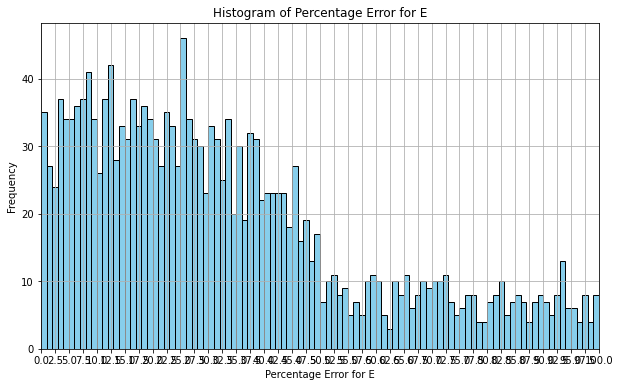

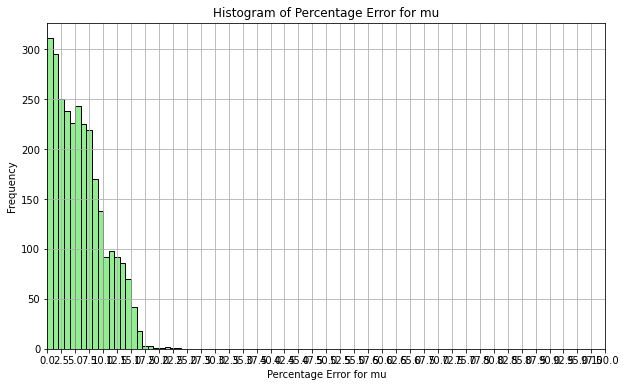

Maximum Percentage Error for E: 3882.9182624816895
Minimum Percentage Error for E: 0.05474784373741609
Maximum Percentage Error for mu: 23.980626782935683
Minimum Percentage Error for mu: 0.004731797680412372


In [17]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [18]:
import pickle

In [19]:
model_file_pickle = "polymers_ANN_model_NU_scaled_cuboid.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [20]:
model_file_pickle1= "polymers_ANN_model_NU_scaled_cuboid.pkl"
with open(model_file_pickle1, 'rb') as file:
    modelx = pickle.load(file)

In [21]:
y_pred1 = modelx.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred1[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred1[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred1[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred1[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred1[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred1[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
Mean Squared Error for E: 5.766565175268802
Mean Squared Error for mu: 93855.71706825236
Median Percentage Error for E: 46.26038385771611
Median Percentage Error for mu: 5.318963212369489
Mean Absolute Error for E: 2.082585104974389
Mean Absolute Error for mu: 0.024672964740044212
Standard Deviation for E: 1.1957887015934412
Standard Deviation for mu: 0.018163666122875986
Mode Percentage Error for E: ModeResult(mode=array([3.2116921]), count=array([2])) 
Mode Percentage Error for E: ModeResult(mode=array([5.15821346]), count=array([2])) 
Mean Absolute percentage Error for E: 113.02190566153375
Mean Absolute percentage Error for mu: 5.955435446422798
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        3.256     4.800905  1.544905      0.373      0.410662  0.037662   
1        0.968     4.660231  3.692231      0.431      0.404098  0.026902   
2        4.599     4.709271  0.110271      0.414      0.406387  0.007613 

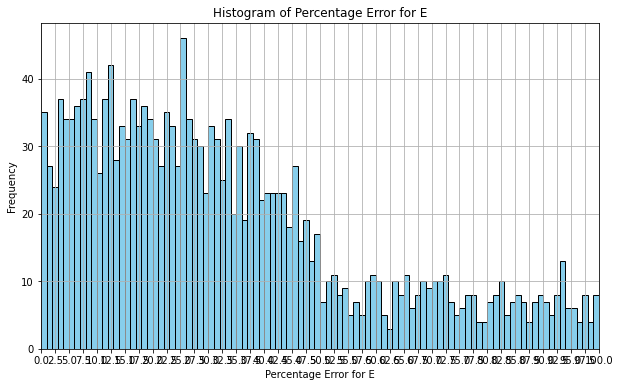

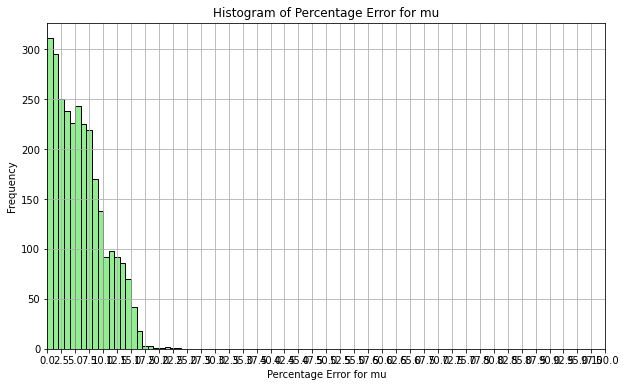

Maximum Percentage Error for E: 3882.9182624816895
Minimum Percentage Error for E: 0.05474784373741609
Maximum Percentage Error for mu: 23.980626782935683
Minimum Percentage Error for mu: 0.004731797680412372


In [23]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')